In [106]:
# Importamos las librerías necesarias
from sklearn import neighbors
from sklearn.model_selection import train_test_split


import pandas as pd
import numpy as np


In [107]:
# Importamos el dataset para manejarlo como un DataFrame
df = pd.read_csv('Leads X Education.csv')

In [108]:
df.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [155]:
df.dtypes

Lead Number                                        int64
Lead Origin                                        int64
Lead Source                                      float64
Do Not Email                                       int64
Do Not Call                                        int64
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
What is your current occupation                    int64
What matters most to you in choosing a course      int64
Lead Profile                                       int64
City                                               int64
Last Notable Activity                              int64
dtype: object

In [110]:
df.drop(['Prospect ID','Country','Specialization','How did you hear about X Education','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Tags','Lead Quality','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Last Activity'],axis=1,inplace=True)

In [152]:
df.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)

In [161]:
df['TotalVisits'].unique()

array([  0.,   5.,   2.,   1.,   8.,  11.,   6.,   3.,   4.,   7.,  13.,
        17.,  nan,  10.,  12.,   9.,  14.,  21.,  15.,  22.,  16.,  18.,
        20.,  43.,  30.,  23.,  55.,  25.,  27.,  29.,  24.,  19.,  26.,
        74., 251.,  32.,  28.,  42.])

In [112]:
df['Lead Origin'] = df['Lead Origin'].map({'API':0, 'Landing Page Submission':1, 'Lead Add Form':2, 'Lead Import':3,
       'Quick Add Form':4})

In [114]:
mapping = {
    'Olark Chat': 0,
    'Organic Search': 1,
    'Direct Traffic': 2,
    'Google': 3,
    'google': 3,
    'Referral Sites': 4,
    'Welingak Website': 5,
    'Reference': 6,
    'Facebook': 7,
    'blog': 8,
    'Pay per Click Ads': 9,
    'bing': 10,
    'Social Media': 11,
    'WeLearn': 12,
    'Click2call': 13,
    'Live Chat': 14,
    'welearnblog_Home': 15,
    'youtubechannel': 16,
    'testone': 17,
    'Press_Release': 18,
    'NC_EDM': 19
}

df['Lead Source'] = df['Lead Source'].map(mapping)

In [117]:
df['Do Not Call'] = df['Do Not Call'].map({'No':0,'Yes':1})

In [116]:
df['Do Not Email'] = df['Do Not Email'].map({'No':0,'Yes':1})

In [123]:
df['What is your current occupation'] = df['What is your current occupation'].map({'Unemployed':0, 'Student':1, 'Working Professional':2, 'Businessman':3,
       'Other':4, 'Housewife':5})

In [129]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].map({'Better Career Prospects':0, 'Flexibility & Convenience':1, 'Other':2})

In [133]:
df['Lead Profile'] = df['Lead Profile'].map({'Select':0, 'Potential Lead':1, 'Other Leads':2, 'Lateral Student':3,
       'Dual Specialization Student':4, 'Student of SomeSchool':5})

In [146]:
df['City'] = df['City'].map({'Select':0, 'Mumbai':1, 'Other Metro Cities':2, 'Thane & Outskirts':3,
       'Other Cities':4, 'Other Cities of Maharashtra':5, 'Tier II Cities':6})

In [154]:
df['Last Notable Activity'] = df['Last Notable Activity'].map({ 'Modified': 0,
    'Email Opened': 1,
    'Page Visited on Website': 2,
    'Email Bounced': 3,
    'Email Link Clicked': 4,
    'Unreachable': 5,
    'Unsubscribed': 6,
    'Had a Phone Conversation': 7,
    'Olark Chat Conversation': 8,
    'SMS Sent': 9,
    'Approached upfront': 10,
    'View in browser link Clicked': 11,
    'Email Received': 12,
    'Email Marked Spam': 13})

In [159]:
df.dropna(subset=['Lead Source'],inplace=True)

In [162]:
df.dropna(subset=['TotalVisits'],inplace=True)


In [163]:
df.describe()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,What matters most to you in choosing a course,Lead Profile,City,Last Notable Activity
count,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000
mean,616229.943817,0.763810,2.313716,0.068110,0.000314,0.481011,3.606717,535.279190,2.479565,0.261299,0.000471,0.605932,1.387006,3.283741
std,23372.348262,0.623096,1.626760,0.251955,0.017715,0.499678,4.852274,565.402288,2.166345,0.683682,0.028010,1.095896,1.544792,3.874442
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,595772.750000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,613735.000000,1.000000,2.000000,0.000000,0.000000,0.000000,3.000000,287.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,637156.750000,1.000000,3.000000,0.000000,0.000000,1.000000,5.000000,1022.250000,3.500000,0.000000,0.000000,1.000000,2.000000,9.000000
max,660737.000000,3.000000,18.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,5.000000,2.000000,5.000000,6.000000,13.000000


In [174]:
k_neighbors = neighbors.KNeighborsRegressor(n_neighbors=3)

In [190]:
data_x = df.drop(['Converted'],axis = 1)
data_y = df['Total Time Spent on Website']
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,test_size=0.1)

In [191]:
k_neighbors.fit(train_x,train_y)

KNeighborsRegressor(n_neighbors=3)

In [192]:
print(k_neighbors.score(test_x,test_y))

0.9875180848302121


## Decision Tree


In [193]:
import seaborn as sb

In [194]:
from sklearn import tree

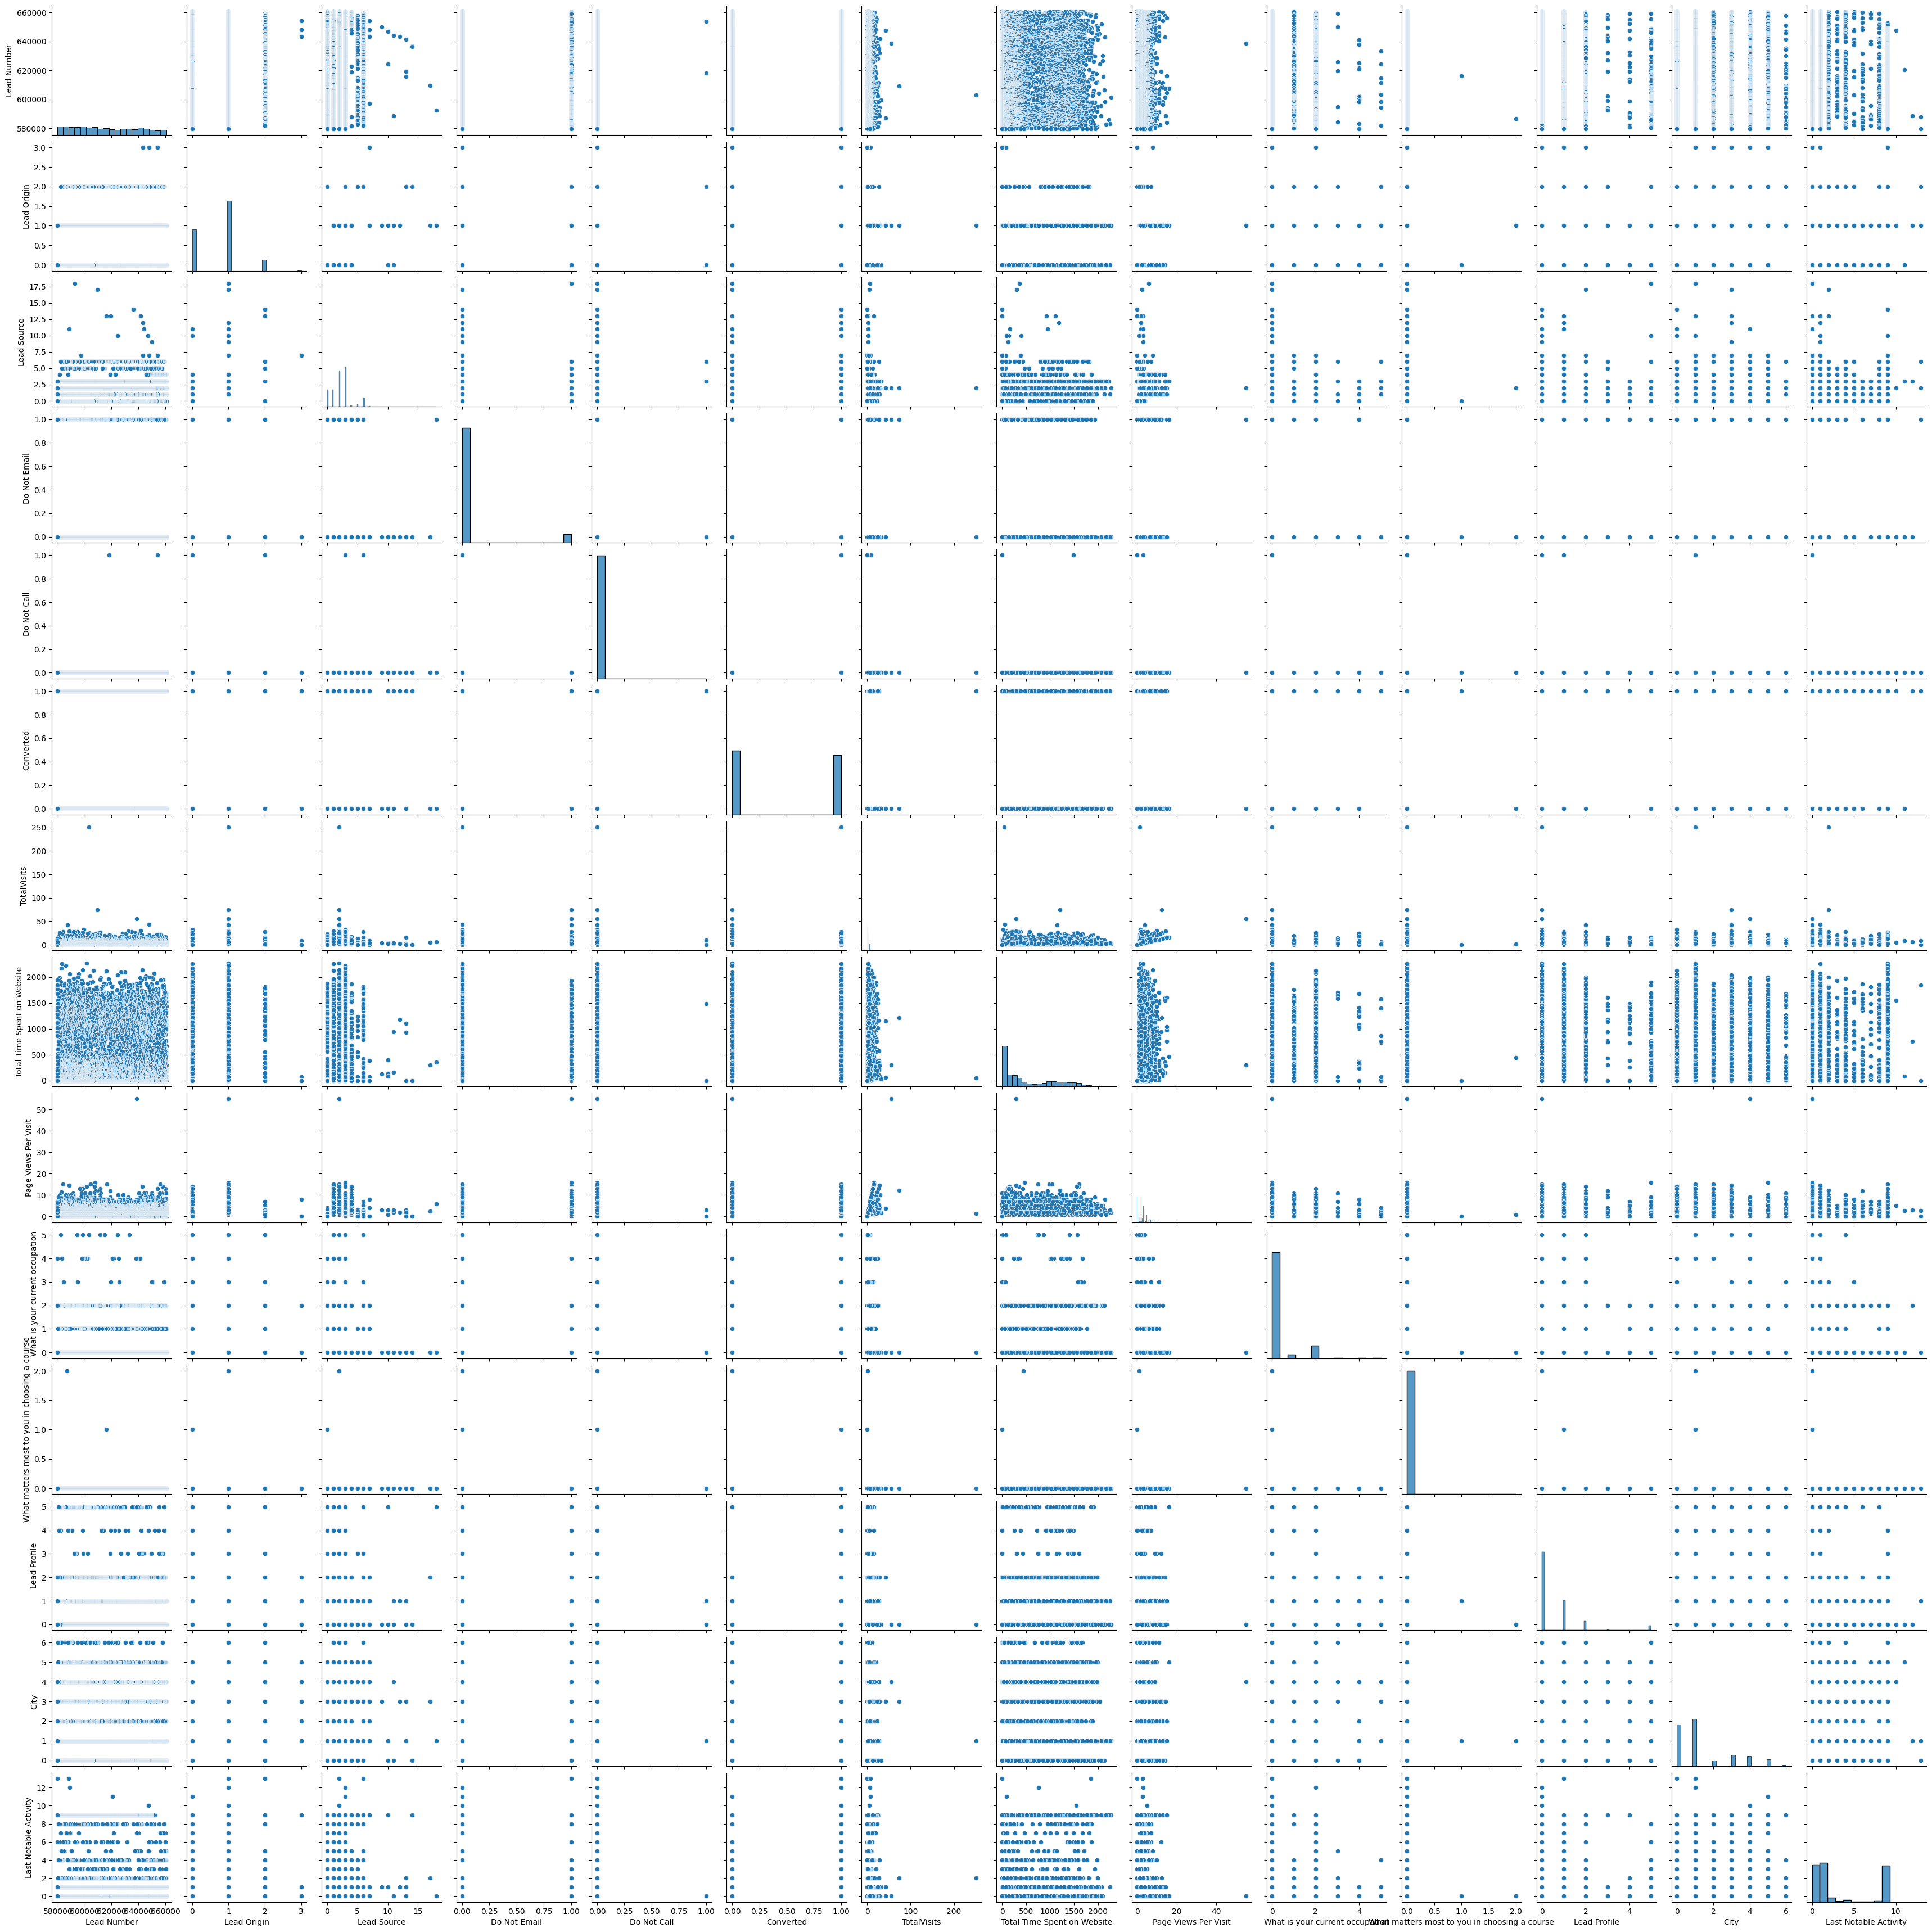

In [195]:
sb.pairplot(df)

In [196]:
data_x_arbol = df.drop('Converted', axis=1)
data_y_arbol = df['Total Time Spent on Website']

In [197]:
train_x_arbol,test_x_arbol,train_y_arbol,test_y_arbol = train_test_split(data_x_arbol,data_y_arbol,test_size=0.1)

In [198]:
decission_tree = tree.DecisionTreeClassifier()

In [199]:
decission_tree.fit(train_x_arbol, train_y_arbol)

DecisionTreeClassifier()

In [200]:
print(f'Score: {round(decission_tree.score(test_x_arbol, test_y_arbol) , 4) * 100.0}%')

Score: 74.29%
